In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Data_Test.xlsx")
final_data=pd.read_excel("Data_Test.xlsx")

In [3]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [6]:
test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [7]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [9]:
test_data[test_data['Power']=='null bhp']['Power'].count()

22

In [10]:
train_data[train_data['Power']=='null bhp']['Power'].count()

107

In [11]:
train_data['Power']=train_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
test_data['Power']=test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
train_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [12]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
dtype: int64

In [13]:
train_data['Mileage'].fillna(train_data['Mileage'].mode()[0] , inplace = True)
train_data['Engine'].fillna(train_data['Engine'].mode()[0] , inplace = True)
train_data['Power'].fillna(train_data['Power'].mode()[0] , inplace = True)
train_data['Seats'].fillna(train_data['Seats'].mode()[0] , inplace = True)
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
test_data['Engine'].fillna(test_data['Engine'].mode()[0] , inplace = True)
test_data['Power'].fillna(test_data['Power'].mode()[0] , inplace = True)
test_data['Seats'].fillna(test_data['Seats'].mode()[0] , inplace = True)
test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [15]:
#removing the units in some columns of the  training dataset
train_data['Mileage'] = train_data['Mileage'].str.split(" " , expand = True)
train_data['Mileage'] = train_data['Mileage'].astype("float")
#repeatig the above steps for the other columns
train_data['Engine'] = train_data['Engine'].str.split(" " , expand = True)
train_data['Engine'] = train_data['Engine'].astype("float")
train_data['Power'] = train_data['Power'].str.split(" " , expand = True)
train_data['Power'] = train_data['Power'].astype("float")
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [16]:
#removing the units in some columns of the testing dataset
test_data['Mileage'] = test_data['Mileage'].str.split(" " , expand = True)
test_data['Mileage'] = test_data['Mileage'].astype("float")
test_data['Engine'] = test_data['Engine'].str.split(" " , expand = True)
test_data['Engine'] = test_data['Engine'].astype("float")
test_data['Power'] = test_data['Power'].str.split(" " , expand = True)
test_data['Power'] = test_data['Power'].astype("float")
test_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [17]:
#Let us check the name variable 
print("The total number of unqiue car :",str(len(train_data['Name'].unique())))

The total number of unqiue car : 1876


In [18]:
#since there are 1876 car and it will be diffcult upon us to study each car type and the realation
#with other vairables lets define a new column with the name brand
train_data['Brand']=train_data['Name'].str.split(" ",2)
x=pd.DataFrame(train_data['Brand'])
train_data['Brand']=x['Brand'].str.get(0)
train_data['Model']=x['Brand'].str.get(1)
print("The car brands are: ",train_data['Brand'].unique())
print("The total number of unqiue car Brands :",str(len(train_data['Brand'].unique())))
print("The car brands are: ",train_data['Model'].unique())
print("The total number of unqiue car Brands :",str(len(train_data['Model'].unique())))

The car brands are:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
The total number of unqiue car Brands : 31
The car brands are:  ['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6' 'i20' 'Alto' 'WRV' 'Corolla' 'Ssangyong' 'Vitara' 'KUV'
 'M-Class' 'Polo' 'Nano' 'Elantra' 'Xcent' 'Thar' 'Grand' 'KWID' 'i10'
 'X-Trail' 'Zen' 'Figo' 'C-Class' 'Cayenne' 'XUV500' 'Terrano' 'Brio'
 'Fiesta' 'Santro' 'Zest' 'Ritz' '5' 'Fortuner' 'Ecosport' 'Verna' 'GO'
 'Omni' 'Etios' 'XF' 'Eeco' 'Civic' 'V40' 'B' 'Scorpio' 'CR-V' 'SLC' '1'
 'Beat' 'Rapid' 'RS5' 'Superb' 'X5' 'GLC' 'Countryman' 'Optra' 'Lodgy'
 'E-Class' 'Baleno' 'Laura' 'NuvoSport' 'Fabia' 'Indi

# Exploratory Data Analysis

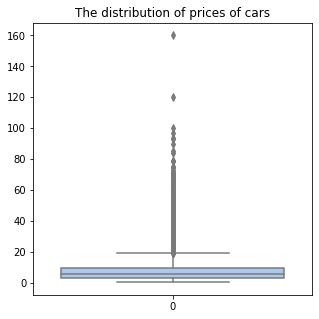

In [19]:
plt.rcParams["figure.figsize"]=[5,5]
plt.title("The distribution of prices of cars")
#for checking outliers if they exist
sns.boxplot(data=train_data['Price'],palette="pastel")

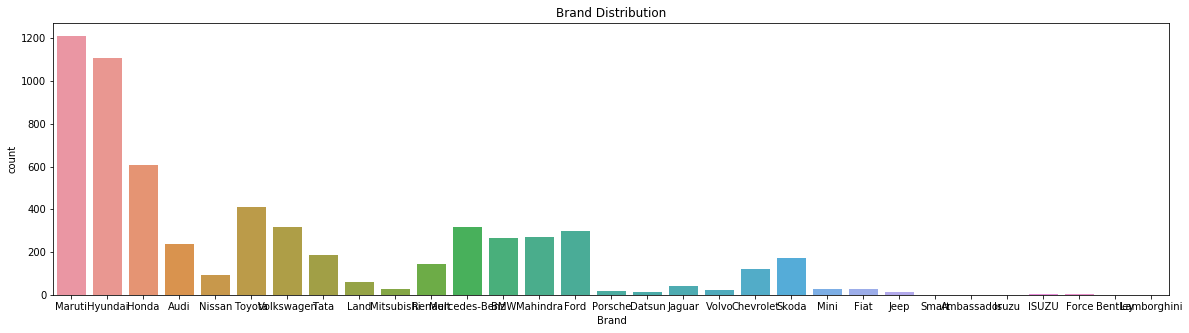

In [20]:
#We make use of pie charts to represent the fields in each category
plt.figure(figsize=(20,5))

c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.title("Brand Distribution")
sns.countplot(x=train_data['Brand'])

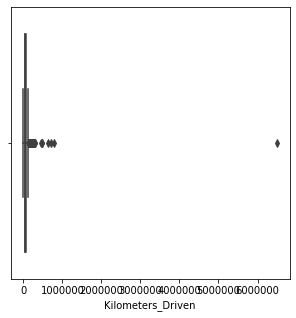

In [21]:
sns.boxplot(x=train_data['Kilometers_Driven'])